Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sümeyye Acar"
COLLABORATORS = ""

---

## Foundations of Data Literacy and Data Science
# Homework 6: Randomness, Distributions and Descriptive Statistics

1) Define a function called *binomial_cdf* which computes the cumulative probability of a number $x$ or fewer successes under a binomial distribution defined by parameters $n$ and $p$. You may reuse the function *binomial_pmf* from the session. Test it against the Python implementation using the values below.

In [2]:
import numpy as np
import pandas as pd
import scipy.special as ssp
import scipy.stats as sst
import matplotlib.pyplot as plt


def binomial_pmf(k: int, p: float, n: int):
    prob = ssp.comb(n, k) * p**k * (1 - p) ** (n - k)
    return prob

In [3]:
def binomial_cdf(x: int, n: int, p: float) -> float:
    return sum(binomial_pmf(k, p, n) for k in range(x + 1))

# raise NotImplementedError()

In [4]:
n=10
p=0.5
x=5
print(binomial_cdf(x, n, p))
print(sst.binom.cdf(x, n, p))

n=20
p=0.3
x=5
print(binomial_cdf(x, n, p))
print(sst.binom.cdf(x, n, p))

0.623046875
0.623046875
0.4163708294474809
0.4163708294474809


2) Define a function called *binomial_quantile* which computes the quantile for a proportion $prop$ of outcomes under a binomial distribution defined by parameters $n$ and $p$. You may reuse the function *binomial_pmf* here as well. Test it on the values below.

In [5]:
def binomial_quantile(prop: float, n: int, p: float) -> int:
    cdf = 0.0
    for k in range(n + 1):
        cdf += binomial_pmf(k, p, n)
        if cdf >= prop:
            return k
    return n 


# raise NotImplementedError()

In [6]:
n0=5
p0=0.5
prop0=0.4
quantie0 = binomial_quantile(prop0, n0, p0)
print(quantie0)

n1=25
p1=0.3
prop1=0.8
quantie1 = binomial_quantile(prop1, n1, p1)
print(quantie1)

2
9


3) Plot the two binomial distributions in the last cell as scatter plots, with vertical lines marking the respective quantile.

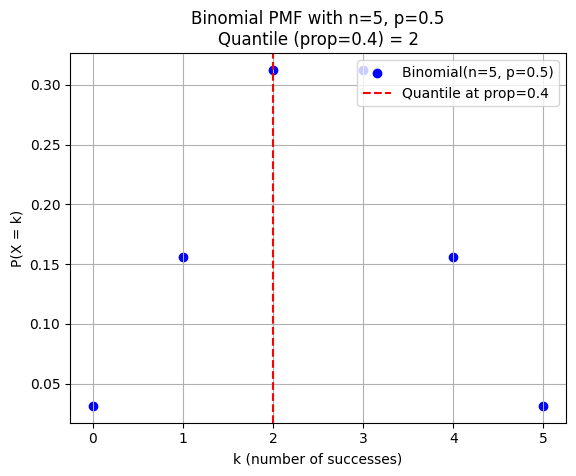

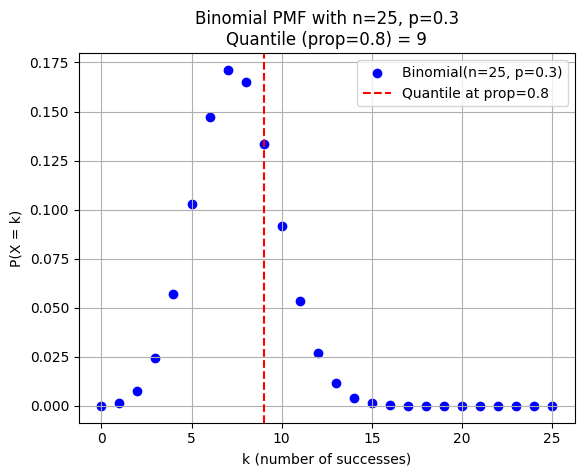

In [7]:
import numpy as np
import matplotlib.pyplot as plt

params = [(5, 0.5, 0.4, quantie0), (25, 0.3, 0.8, quantie1)]

# Plot here
for i, (n, p, prop, quantile) in enumerate(params):
    x = np.arange(0, n + 1)
    y = [binomial_pmf(k, p, n) for k in x]

    plt.figure()
    plt.scatter(x, y, label=f"Binomial(n={n}, p={p})", color="blue")
    plt.axvline(quantile, color="red", linestyle="--", label=f"Quantile at prop={prop}")
    plt.title(f"Binomial PMF with n={n}, p={p}\nQuantile (prop={prop}) = {quantile}")
    plt.xlabel("k (number of successes)")
    plt.ylabel("P(X = k)")
    plt.legend()
    plt.grid(True)
    plt.show()


# raise NotImplementedError()

4) Define a function *empirical_median* which takes a one-dimensional array $x$ of any length as input and computes its median. Test it against the sequence below and make sure it gives the same result as the numpy implementation.

In [8]:
def empirical_median(x):
    x_sorted = sorted(x)
    n = len(x_sorted)
    mid = n // 2
    if n % 2 == 0:
        return (x_sorted[mid - 1] + x_sorted[mid]) / 2
    else:
        return x_sorted[mid]


# raise NotImplementedError()

In [9]:
arrie = np.array([2,43,6,8,4,2,3,5,7,9,9,5,3,23,3,3,45,5,6,7,87,10])
empirical_median(arrie) == np.median(arrie)

np.True_